In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os

In [ ]:
# definindo diretórios e classes
base_dir = 'drive/MyDrive/dataset'

test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

test_0_dir = os.path.join(test_dir, '0')
test_1_dir = os.path.join(test_dir, '1')
test_2_dir = os.path.join(test_dir, '2')
test_3_dir = os.path.join(test_dir, '3')
test_4_dir = os.path.join(test_dir, '4')

train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
train_3_dir = os.path.join(train_dir, '3')
train_4_dir = os.path.join(train_dir, '4')

validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')
validation_2_dir = os.path.join(validation_dir, '2')
validation_3_dir = os.path.join(validation_dir, '3')
validation_4_dir = os.path.join(validation_dir, '4')

In [ ]:
class_names = ['0', '1', '2', '3', '4']
class_type = {0:'0',  1 : '1', 2:'2', 3:'3', 4:'4'}

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale =  1.0/255.)
train_datagen = ImageDataGenerator(rescale =  1.0/255.)
validation_datagen = ImageDataGenerator(rescale =  1.0/255.)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  color_mode='rgb',
                                                  target_size=(224, 224))

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    target_size=(224, 224))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='categorical',
                                                              color_mode='rgb',
                                                              target_size=(224,224))

Found 1706 images belonging to 5 classes.
Found 17344 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [ ]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(224,224,3), include_top=False),
])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 64)          1179712   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0 

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                  validation_data=test_generator,
                  steps_per_epoch=100,
                  epochs=6,
                  verbose=1)

Epoch 1/6
100/100 [==============================] - 2025s 20s/step - loss: 1.5621 - acc: 0.3450 - val_loss: 1.3989 - val_acc: 0.4039
Epoch 2/6
100/100 [==============================] - 1957s 20s/step - loss: 1.4434 - acc: 0.3951 - val_loss: 1.4099 - val_acc: 0.4039
Epoch 3/6
100/100 [==============================] - 1965s 20s/step - loss: 1.4395 - acc: 0.3941 - val_loss: 1.4001 - val_acc: 0.4039
Epoch 4/6
100/100 [==============================] - 1950s 20s/step - loss: 1.4293 - acc: 0.3953 - val_loss: 1.3999 - val_acc: 0.4039
Epoch 5/6
100/100 [==============================] - 1949s 20s/step - loss: 1.4232 - acc: 0.3961 - val_loss: 1.3920 - val_acc: 0.4039
Epoch 6/6
100/100 [==============================] - 1949s 20s/step - loss: 1.4235 - acc: 0.3973 - val_loss: 1.4059 - val_acc: 0.4039


In [ ]:
model.save('drive/MyDrive/models/cnn_resnet_cat.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/models/cnn_resnet_cat.h5')

In [ ]:
new_history = new_model.fit(train_generator,
                  validation_data=test_generator,
                  steps_per_epoch=100,
                  epochs=6,
                  verbose=1)

Epoch 1/6
100/100 [==============================] - 2530s 25s/step - loss: 1.3650 - acc: 0.4016 - val_loss: 1.3558 - val_acc: 0.4050
Epoch 2/6
100/100 [==============================] - 1106s 11s/step - loss: 1.3659 - acc: 0.4067 - val_loss: 1.3576 - val_acc: 0.4050
Epoch 3/6
100/100 [==============================] - 993s 10s/step - loss: 1.3542 - acc: 0.4010 - val_loss: 1.3508 - val_acc: 0.4050
Epoch 4/6
100/100 [==============================] - 979s 10s/step - loss: 1.3455 - acc: 0.4092 - val_loss: 1.3481 - val_acc: 0.4068
Epoch 5/6
100/100 [==============================] - 977s 10s/step - loss: 1.3507 - acc: 0.4103 - val_loss: 1.3506 - val_acc: 0.4132
Epoch 6/6
100/100 [==============================] - 974s 10s/step - loss: 1.3497 - acc: 0.4076 - val_loss: 1.3734 - val_acc: 0.4045


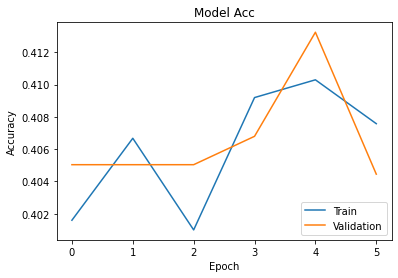

In [ ]:
import matplotlib.pyplot as plt

plt.plot(new_history.history['acc'])
plt.plot(new_history.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

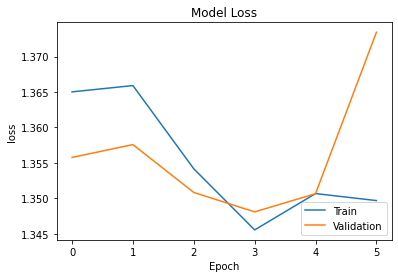

In [ ]:
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
new_model.save('drive/MyDrive/models/cnn_resnet_cat_v2.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/models/cnn_resnet_cat_v2.h5')

In [ ]:
new_model.evaluate(test_generator)

86/86 [==============================] - 289s 3s/step - loss: 1.4059 - acc: 0.4039


[1.4058542251586914, 0.403868705034256]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def get_img_array(img_path):
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis=0)
  
  return img

In [ ]:
def test_model(path):
    img = get_img_array(path)

    res = class_type[np.argmax(new_model.predict(img))]
    print(f"The given X-Ray image is of type = {res}")
    print()

    plt.imshow(img[0]/255, cmap = "gray")
    plt.title("input image")
    plt.show()


1/1 [==============================] - 1s 620ms/step
The given X-Ray image is of type = 4



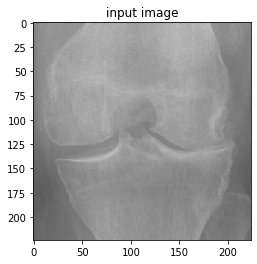

In [ ]:
test_model('/content/drive/MyDrive/dataset/test/4/9448133L.png')

In [ ]:
classes_name = ('0','1','2','3','4')
height, width = (224, 224)
test_dataset = test_datagen.flow_from_directory(test_dir, 
                                                target_size = (height, width), 
                                                classes = classes_name, 
                                                batch_size = 20, 
                                                shuffle = False)


test_st e= test_dataset
test_set.reset()
predictions = new_model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=-1)

y_test = test_dataset.labels
cm = confusion_matrix(y_test,y_pred)
cm2 = classification_report(test_dataset.classes, y_pred)


print(classification_report(test_dataset.classes, y_pred))


file = open('time_categorial_metrics.txt', 'w')
file.write('tempo %s' % cm2)
file.close()

Found 1706 images belonging to 5 classes.
86/86 [==============================] - 238s 3s/step
              precision    recall  f1-score   support

           0       0.40      1.00      0.58       689
           1       0.00      0.00      0.00       296
           2       0.00      0.00      0.00       447
           3       0.00      0.00      0.00       223
           4       0.00      0.00      0.00        51

    accuracy                           0.40      1706
   macro avg       0.08      0.20      0.12      1706
weighted avg       0.16      0.40      0.23      1706



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat